# 1. Introduction aux arbres de décision

##### Les arbres de décision sont des modèles d'apprentissage automatique supervisé qui permettent de prendre des décisions en suivant une série de règles simples organisées de manière hiérarchique. Ils sont particulièrement appréciés pour leur interprétabilité et leur capacité à traiter aussi bien des problèmes de classification que de régression.
##### Un arbre de décision se présente sous forme d'un graphe arborescent où:

- Chaque nœud interne représente un test sur un attribut
- Chaque branche représente un résultat du test
- Chaque feuille représente une décision finale (classe ou valeur)

### Avantages des arbres de décision:

- Facilement interprétables (modèle "boîte blanche")
- Peu de préparation des données requise
- Capable de traiter des données numériques et catégorielles
- Gestion naturelle des valeurs manquantes
- Performance calculatoire efficace

### Inconvénients:

- Tendance au surapprentissage (overfitting)
- Instabilité (sensibilité aux petites variations dans les données)
- Biais vers les attributs avec plus de niveaux

# 2. Fondements théoriques


### Construction d'un arbre de décision
La construction d'un arbre de décision suit généralement une approche descendante récursive (top-down):

- Choix de l'attribut le plus discriminant pour le nœud racine
- Division des données selon cet attribut
- Répétition du processus pour chaque sous-ensemble de données
- Arrêt lorsqu'un critère de terminaison est atteint (ex: profondeur maximale, pureté du nœud)

### Critères de division
Pour déterminer l'attribut optimal à chaque nœud, plusieurs mesures sont utilisées:

### Pour les problèmes de classification:




- **Indice de Gini**: Mesure l'impureté d'un nœud $Gini(t) = 1 - \sum_{i=1}^{c} p(i|t)^2$  
  où $p(i|t)$ est la proportion d'observations de classe $i$ dans le nœud $t$.

- **Entropie et Gain d'information**: Mesure de la réduction de l'incertitude  
  $$
  Entropie(t) = -\sum_{i=1}^{c} p(i|t) \log_2 p(i|t)
  $$
  $$
  GainInfo(t, a) = Entropie(t) - \sum_{v \in Valeurs(a)} \frac{|t_v|}{|t|} Entropie(t_v)
  $$


### Pour les problèmes de régression:

- **Réduction de la variance**:  
  $Variance(t) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \bar{y})^2$  
  $Reduction(t, a) = Variance(t) - \sum_{v \in Valeurs(a)} \frac{|t_v|}{|t|} Variance(t_v)$

### Élagage (pruning)

L'élagage est une technique pour réduire la complexité et éviter le surapprentissage :

- **Pré-élagage**: Arrêter la croissance de l'arbre avant qu'il ne devienne trop spécifique
- **Post-élagage**: Construire l'arbre complet, puis éliminer les branches peu significatives


# 3. Préparation des données
Importons d'abord les bibliothèques nécessaires:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

### Chargement du jeu de données
Pour cet exemple, nous utiliserons le célèbre jeu de données Iris:

In [3]:
# Importation du jeu de données Iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Création d'un DataFrame pour une meilleure visualisation
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

### Exploration des données


In [4]:
# Afficher les premières lignes du DataFrame
print(df.head())

# Résumé statistique
print(df.describe())

# Vérification des valeurs manquantes
print(f"Nombre de valeurs manquantes: {df.isnull().sum().sum()}")

# Distribution des classes
print(df['species'].value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%            

### Visualisation des données


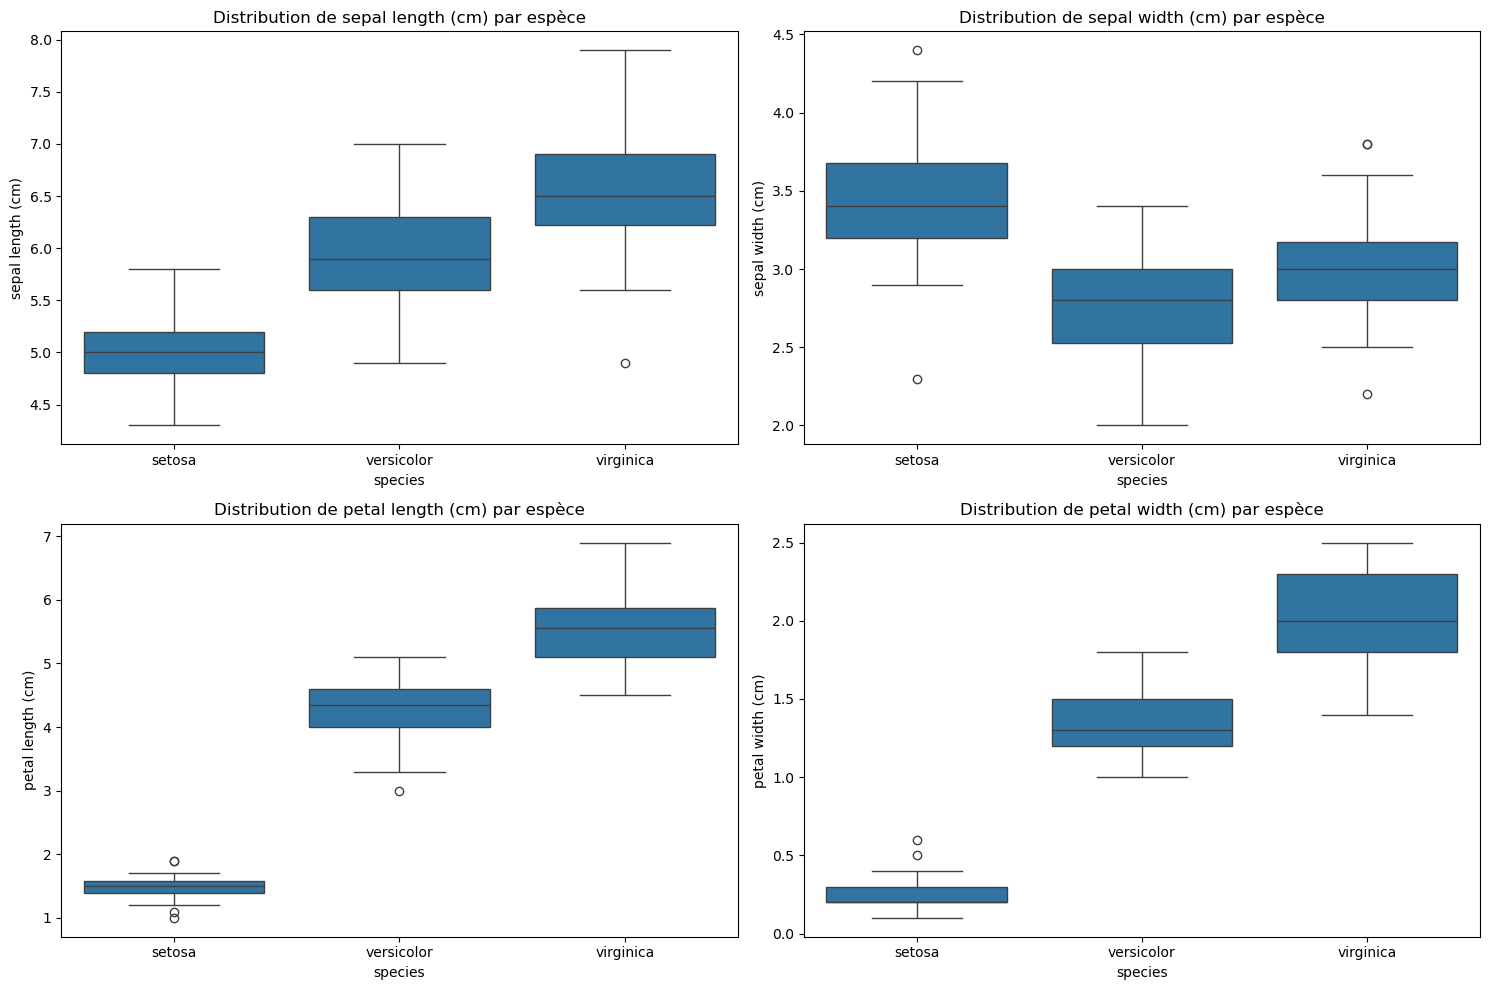

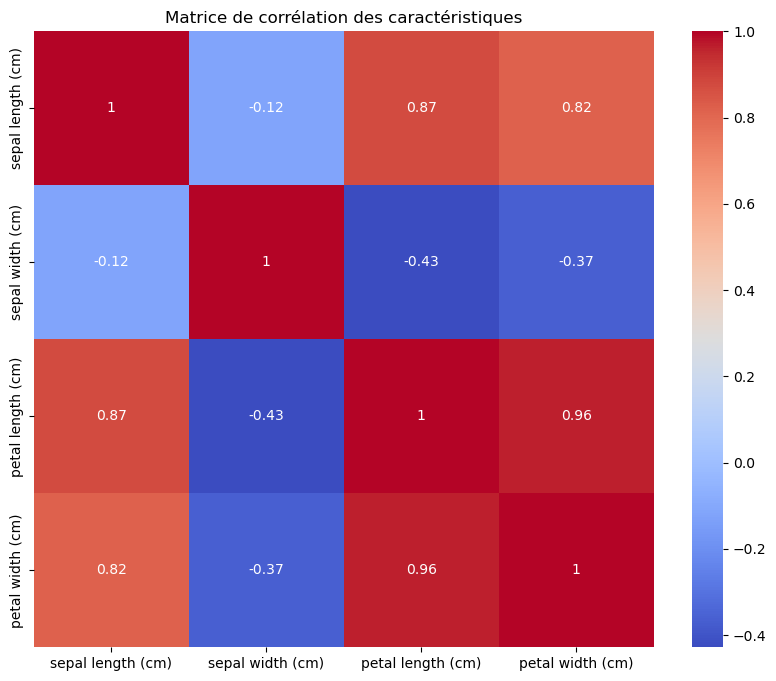

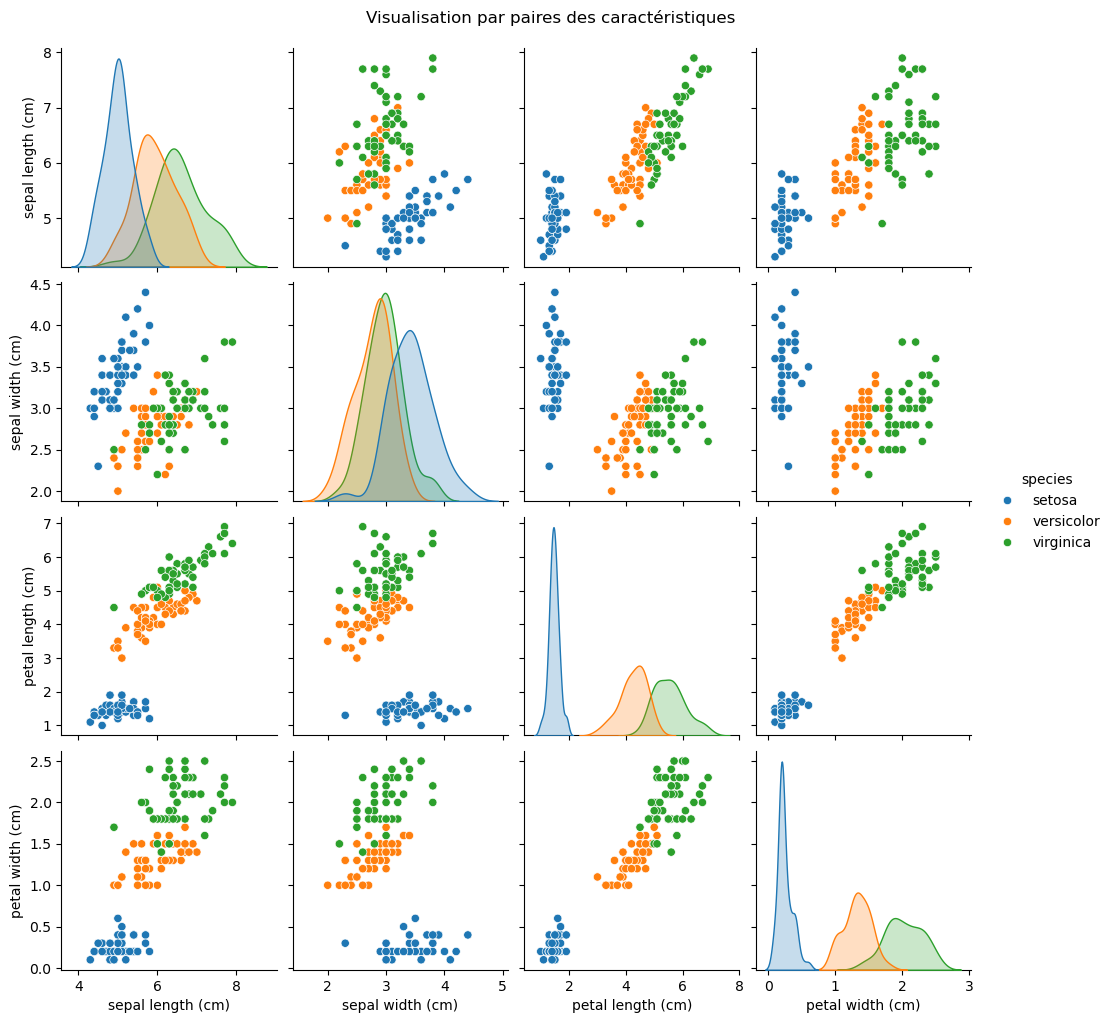

In [5]:
# Distribution des caractéristiques par espèce
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Distribution de {feature} par espèce')
plt.tight_layout()
plt.show()

# Matrice de corrélation
plt.figure(figsize=(10, 8))
corr = df.drop(['target', 'species'], axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des caractéristiques')
plt.show()

# Visualisation par paires
sns.pairplot(df, hue='species', vars=feature_names)
plt.suptitle('Visualisation par paires des caractéristiques', y=1.02)
plt.show()

### Division des données


In [6]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape}")
print(f"Taille de l'ensemble de test: {X_test.shape}")

Taille de l'ensemble d'entraînement: (105, 4)
Taille de l'ensemble de test: (45, 4)


# 4. Implémentation d'un arbre de décision
### Classification avec arbre de décision

Précision: 0.9333

Rapport de classification:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



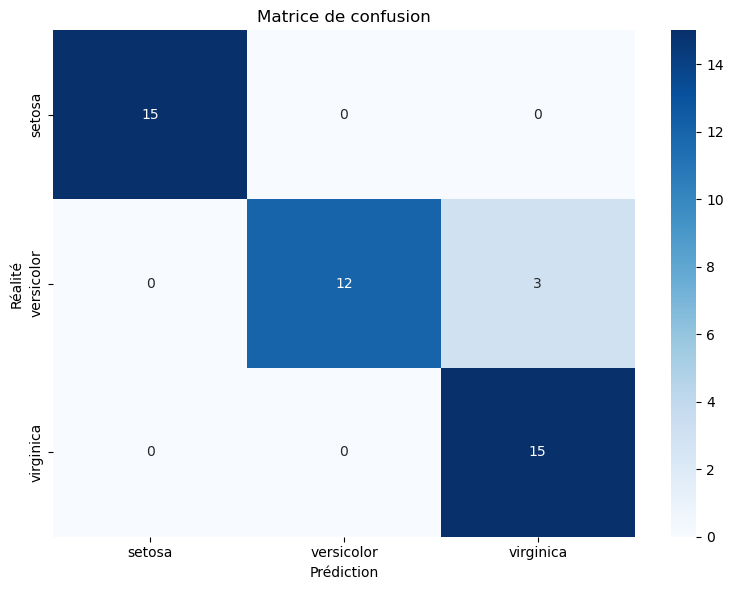

In [7]:
# Création et entraînement du modèle
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédictions
y_pred = clf.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision: {accuracy:.4f}")

# Rapport de classification détaillé
print("\nRapport de classification:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de confusion')
plt.tight_layout()
plt.show()

### Régression avec arbre de décision
Pour illustrer la régression, créons un exemple simple avec un jeu de données synthétique:

Erreur quadratique moyenne (MSE): 166.8571
Racine de l'erreur quadratique moyenne (RMSE): 12.9173


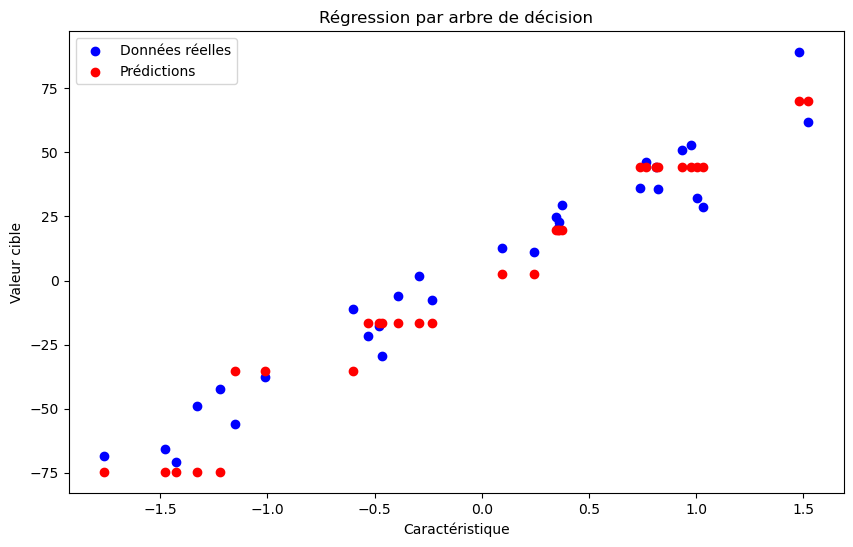

In [8]:
# Création d'un jeu de données synthétique pour la régression
from sklearn.datasets import make_regression

X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Modèle de régression
regr = DecisionTreeRegressor(max_depth=3, random_state=42)
regr.fit(X_reg_train, y_reg_train)

# Prédictions
y_reg_pred = regr.predict(X_reg_test)

# Évaluation
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
print(f"Erreur quadratique moyenne (MSE): {mse:.4f}")
print(f"Racine de l'erreur quadratique moyenne (RMSE): {rmse:.4f}")

# Visualisation des prédictions
plt.figure(figsize=(10, 6))
plt.scatter(X_reg_test, y_reg_test, color='blue', label='Données réelles')
plt.scatter(X_reg_test, y_reg_pred, color='red', label='Prédictions')
plt.xlabel('Caractéristique')
plt.ylabel('Valeur cible')
plt.title('Régression par arbre de décision')
plt.legend()
plt.show()

# 5. Visualisation de l'arbre
### Visualisation de l'arbre de décision pour la classification

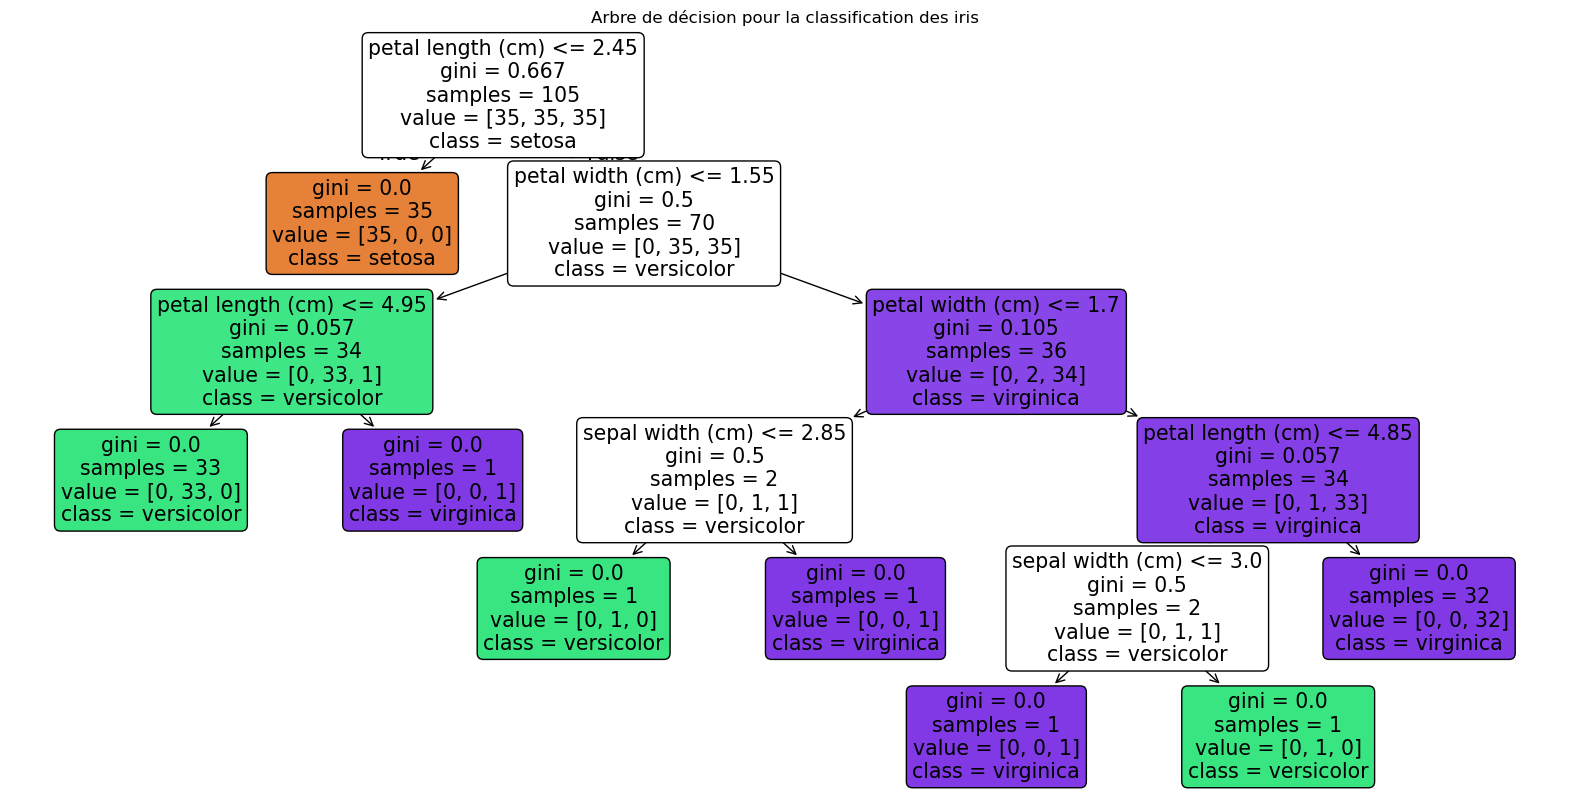

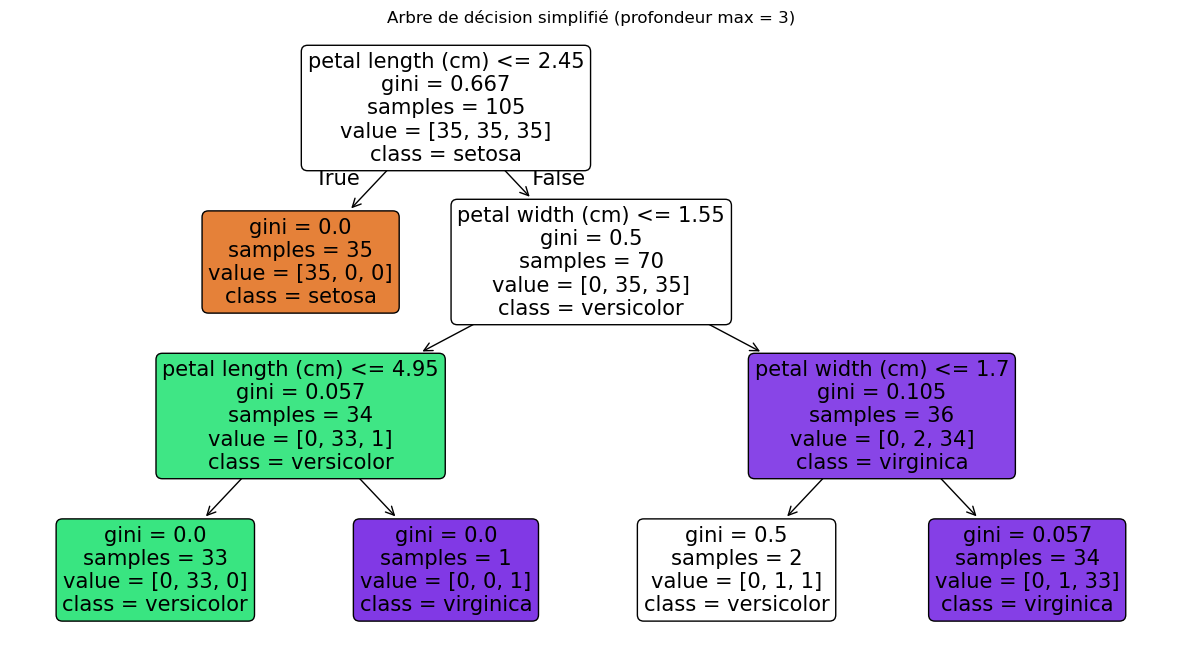

In [9]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.title('Arbre de décision pour la classification des iris')
plt.show()

# Pour un arbre plus lisible, limitons la profondeur
clf_simple = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_simple.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(clf_simple, filled=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.title('Arbre de décision simplifié (profondeur max = 3)')
plt.show()

### Visualisation de l'arbre de décision pour la régression


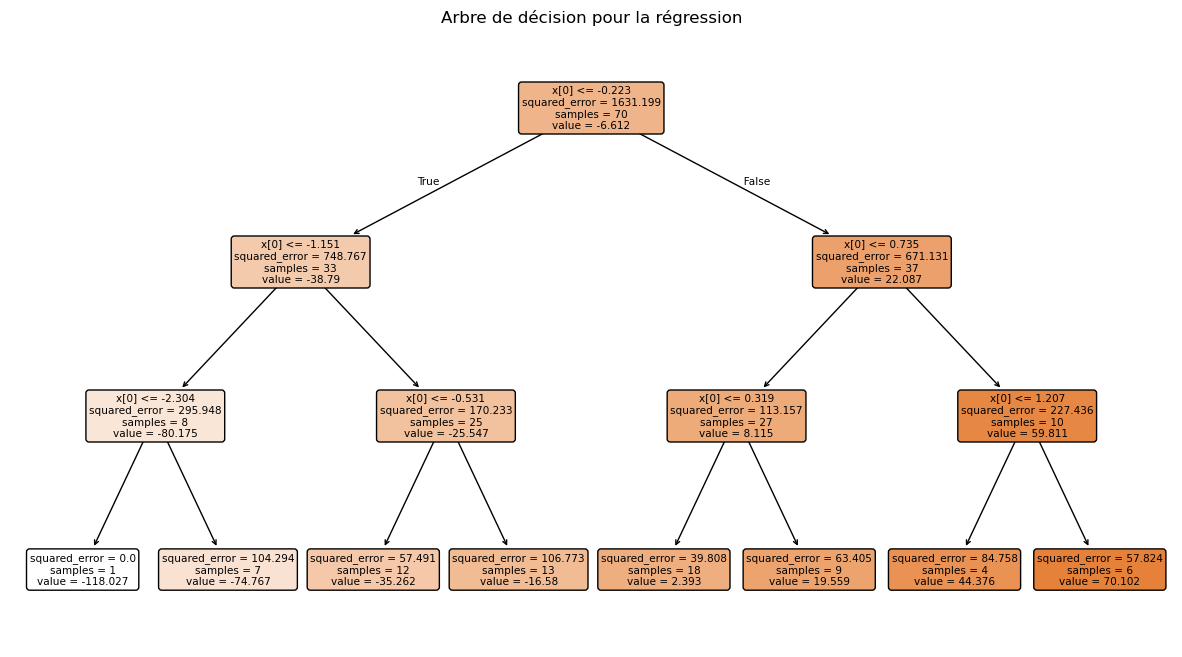

In [10]:
plt.figure(figsize=(15, 8))
plot_tree(regr, filled=True, rounded=True)
plt.title('Arbre de décision pour la régression')
plt.show()

### Importance des caractéristiques


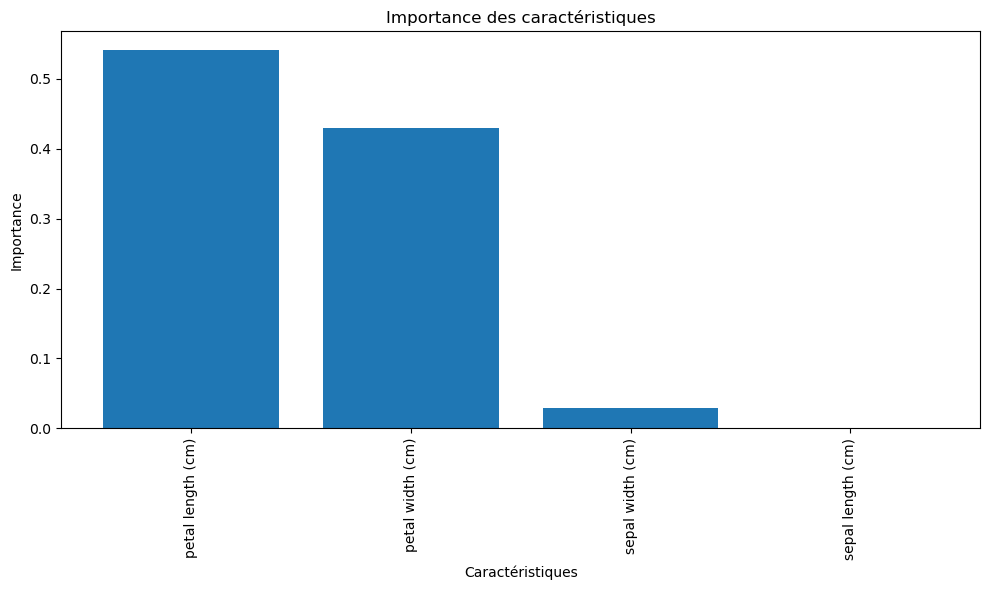

In [11]:
# Visualisation de l'importance des caractéristiques
plt.figure(figsize=(10, 6))
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.title('Importance des caractéristiques')
plt.tight_layout()
plt.show()

# 6. Évaluation du modèle
### Validation croisée


In [12]:
from sklearn.model_selection import cross_val_score, KFold

# Validation croisée avec 5 plis
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=cv)

print(f"Scores de validation croisée: {cv_scores}")
print(f"Précision moyenne: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Scores de validation croisée: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Précision moyenne: 0.9533 ± 0.0267


### Courbe d'apprentissage


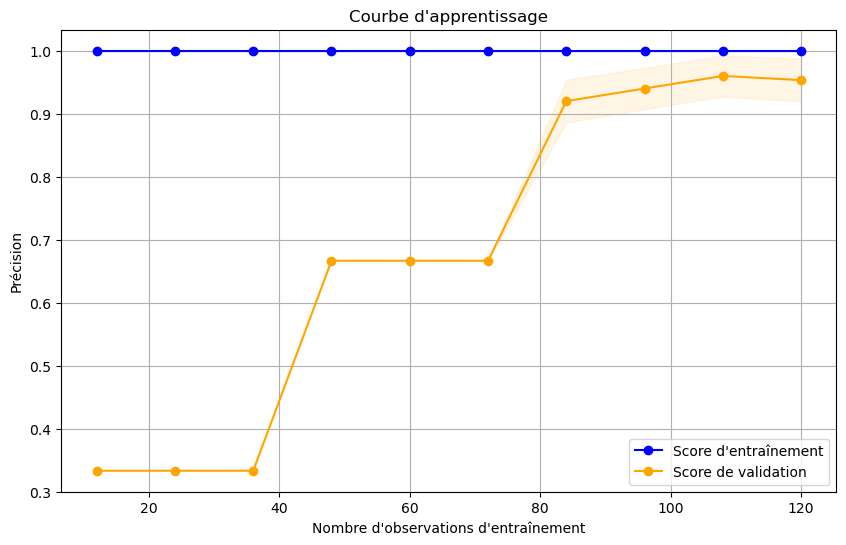

In [13]:
from sklearn.model_selection import learning_curve

# Génération des courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcul des moyennes et écarts-types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Visualisation
plt.figure(figsize=(10, 6))
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score d\'entraînement')
plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Score de validation')
plt.xlabel('Nombre d\'observations d\'entraînement')
plt.ylabel('Précision')
plt.title('Courbe d\'apprentissage')
plt.legend(loc='best')
plt.show()

# 7. Optimisation des hyperparamètres
### Recherche par grille (Grid Search)

In [14]:
from sklearn.model_selection import GridSearchCV

# Définition des hyperparamètres à tester
param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                          param_grid, 
                          cv=5, 
                          scoring='accuracy',
                          verbose=1,
                          n_jobs=-1)

grid_search.fit(X, y)

# Affichage des meilleurs paramètres
print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"Meilleure précision: {grid_search.best_score_:.4f}")

# Création du modèle optimisé
best_clf = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs paramètres: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleure précision: 0.9733


### Visualisation de l'arbre optimisé


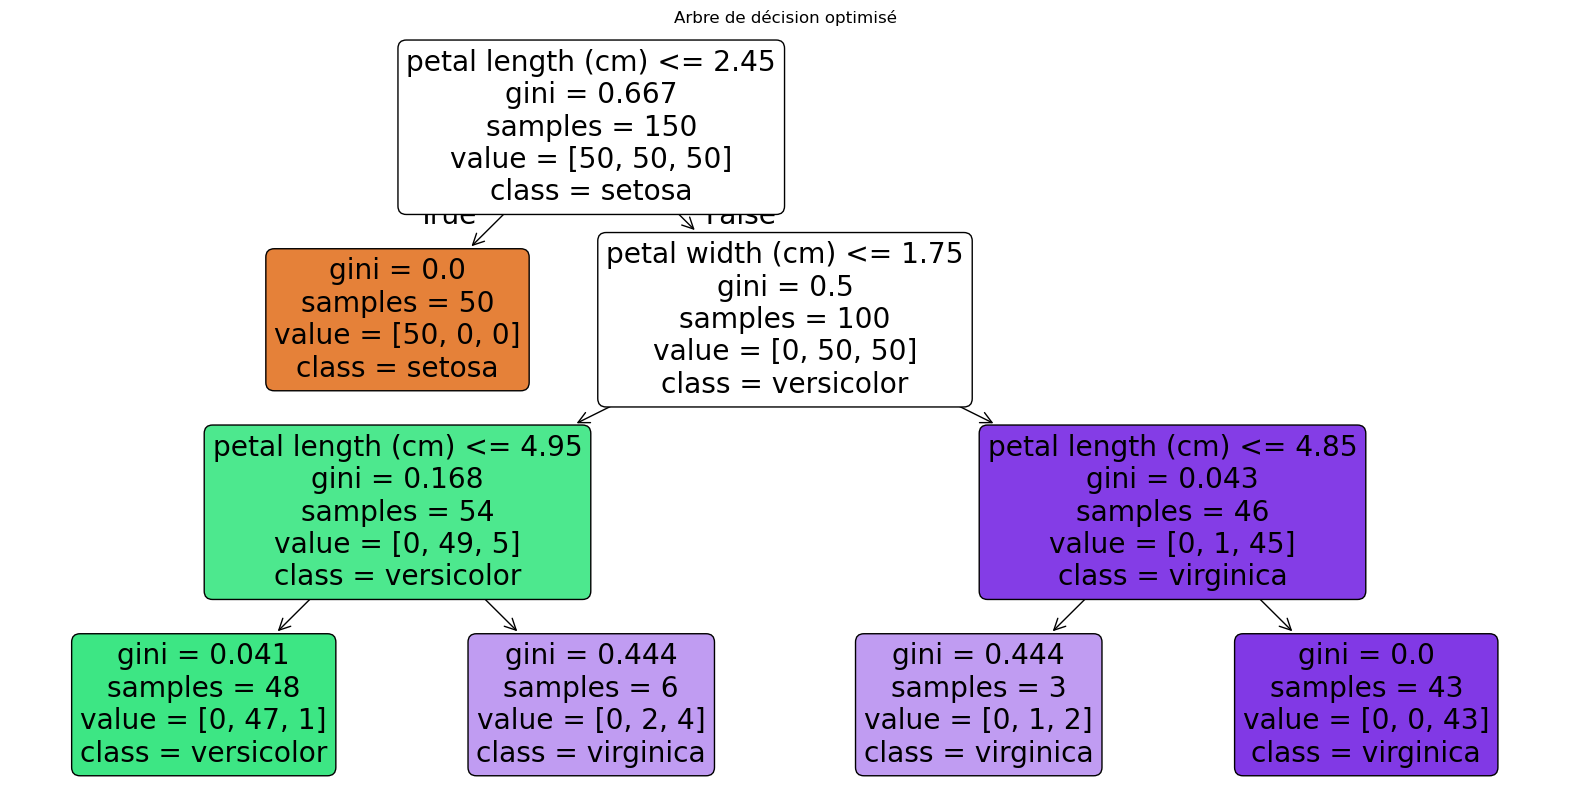

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.title('Arbre de décision optimisé')
plt.show()

# 8. Cas d'utilisation et limites
### Cas d'utilisation courants
Les arbres de décision sont particulièrement adaptés pour:

1. Problèmes de classification et de régression
    - Diagnostic médical
    - Détection de fraude
    - Segmentation de clientèle
    - Prédiction de défauts de paiement



2. Analyse exploratoire des données
    - Identification des variables importantes
    - Compréhension des relations entre variables




3. Systèmes d'aide à la décision
    - Création de règles métier compréhensibles
    - Support visuel pour l'explication de décisions


### Limites et solutions

| **Limite**                                        | **Solution**                                                                 |
|---------------------------------------------------|------------------------------------------------------------------------------|
| Surapprentissage                                  | Élagage, limitation de la profondeur                                         |
| Instabilité                                       | Méthodes d'ensemble (Random Forest, Gradient Boosting)                      |
| Biais vers les attributs avec plus de niveaux     | Critères de division adaptés                                                |
| Difficulté à capturer des relations linéaires     | Transformations préalables des données                                      |
| Sensibilité aux données déséquilibrées            | Techniques de rééchantillonnage, pondération des classes                    |


### Comparaison avec d'autres algorithmes


C:\Users\AYOUB KHABALI\AppData\Local\Temp\ipykernel_5232\1919017972.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_results, labels=clf_names)


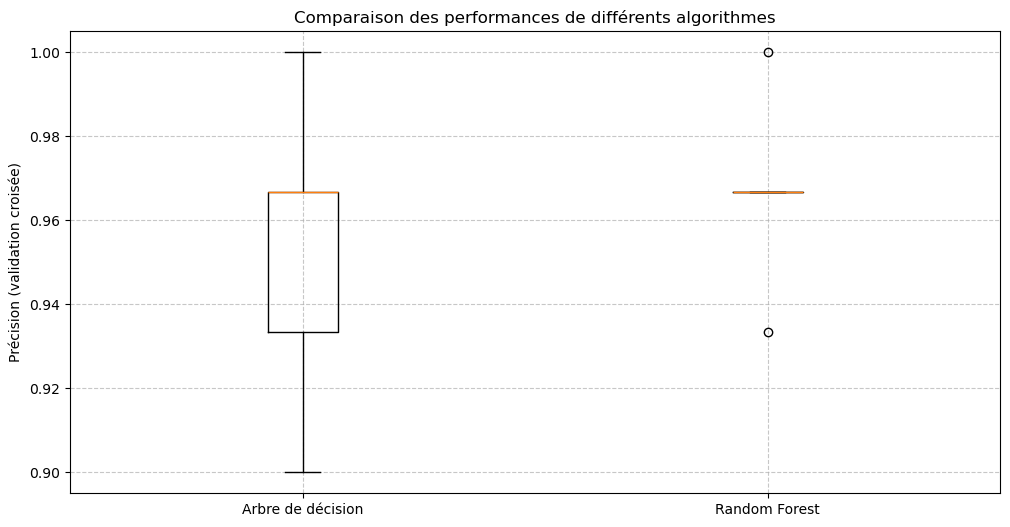

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Liste des classifieurs à comparer
classifiers = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
]

# Noms des classifieurs
clf_names = [
    'Arbre de décision',
    'Random Forest',
]

# Évaluation par validation croisée
cv_results = []
for clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    cv_results.append(scores)

# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.boxplot(cv_results, labels=clf_names)
plt.title('Comparaison des performances de différents algorithmes')
plt.ylabel('Précision (validation croisée)')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

9. Conclusion
### Résumé des points clés
Les arbres de décision sont des modèles d'apprentissage automatique puissants et interpretables qui:
    
    - Permettent de modéliser des décisions complexes à travers une structure hiérarchique
    - Fonctionnent bien tant pour la classification que pour la régression
    - Nécessitent peu de prétraitement des données
    - Sont facilement visualisables et interprétables
    - Peuvent souffrir de surapprentissage s'ils ne sont pas correctement élagués
    - Servent de base à des méthodes d'ensemble plus robustes (Random Forest, etc.)

### Bonnes pratiques

1. Préparation des données
    
    - Les arbres de décision peuvent gérer différents types de données, mais une normalisation peut être utile pour certaines analyses
    - Traitement approprié des valeurs manquantes
    

2. Prévention du surapprentissage

    - Limitation de la profondeur maximale
    - Définition d'un nombre minimal d'observations par feuille
    - Application de techniques d'élagage


3. Optimisation des performances

    - Recherche par grille des hyperparamètres
    - Validation croisée pour une évaluation robuste
    - Considération des méthodes d'ensemble pour améliorer la stabilité



### Extensions et domaines connexes

- Random Forest: Ensemble d'arbres de décision entraînés sur des sous-échantillons aléatoires
- Gradient Boosting: Construction séquentielle d'arbres pour corriger les erreurs des précédents
-  XGBoost, LightGBM, CatBoost: Implémentations optimisées d'algorithmes de boosting

Les arbres de décision restent une technique fondamentale en apprentissage automatique, offrant un équilibre unique entre performance, interprétabilité et flexibilité.